# Data cleaning for HBCU map

In [1]:
#import libraries to use
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [2]:
#loading in data
data=pd.read_csv("CollegeNavigator_Search_2021-09-13_15.20.55.csv")
data.head()

,Name,Address,Website,Type,Awards offered,Campus setting,Campus housing,Student population,Undergraduate students,Graduation Rate,Transfer-Out Rate,Cohort Year *,Net Price **,Largest Program,IPEDS ID,OPE ID
0,Alabama A & M University,"4900 Meridian Street, Normal, Alabama 35762",www.aamu.edu/,"4-year, Public",Bachelor's degree|Master's degree|Post-master'...,City: Midsize,Yes,6172.0,5273.0,29%,24%,Fall 2014,"$15,373",-,100654.0,100200.0
1,Alabama State University,"915 S Jackson Street, Montgomery, Alabama 3610...",www.alasu.edu/,"4-year, Public",Bachelor's degree|Postbaccalaureate certificat...,City: Midsize,Yes,4190.0,3750.0,32%,33%,Fall 2014,"$13,282",-,100724.0,100500.0
2,Albany State University,"504 College Drive, Albany, Georgia 31705",https://www.asurams.edu/,"4-year, Public",One but less than two years certificate|Associ...,City: Small,Yes,6122.0,5778.0,26%,45%,Fall 2014,"$13,678",-,138716.0,154400.0
3,Alcorn State University,"1000 ASU Dr Ste 359, Alcorn State, Mississippi...",www.alcorn.edu/,"4-year, Public",Associate's degree|Bachelor's degree|Master's ...,Rural: Remote,Yes,3523.0,3069.0,45%,NaN,Fall 2014,"$17,804",-,175342.0,239600.0
4,Allen University,"1530 Harden Street, Columbia, South Carolina 2...",www.allenuniversity.edu/,"4-year, Private not-for-profit",Bachelor's degree|Master's degree,City: Midsize,Yes,817.0,754.0,19%,23%,Fall 2014,"$13,858",-,217624.0,341700.0


In [3]:
#look at tail of file
data.tail()

,Name,Address,Website,Type,Awards offered,Campus setting,Campus housing,Student population,Undergraduate students,Graduation Rate,Transfer-Out Rate,Cohort Year *,Net Price **,Largest Program,IPEDS ID,OPE ID
100,Winston-Salem State University,"601 Martin Luther King Jr Dr, Winston-Salem, N...",www.wssu.edu/,"4-year, Public",Bachelor's degree|Postbaccalaureate certificat...,City: Midsize,Yes,5121.0,4656.0,50%,29%,Fall 2014,"$11,868",-,199999.0,298600.0
101,Xavier University of Louisiana,"1 Drexel Drive, New Orleans, Louisiana 70125-1098",https://www.xula.edu/,"4-year, Private not-for-profit",Less than one year certificate|Bachelor's degr...,City: Large,Yes,3325.0,2530.0,50%,36%,Fall 2014,"$19,066",-,160904.0,203200.0
102,NaN,* Cohort Year represents the year for which st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,** Net Price is Average Net Price for 2019-202...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,"NA (Not applicable) - Graduation rate, transfe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop unneeded rows at end of file
data=data.iloc[:102,:]
data.tail()

,Name,Address,Website,Type,Awards offered,Campus setting,Campus housing,Student population,Undergraduate students,Graduation Rate,Transfer-Out Rate,Cohort Year *,Net Price **,Largest Program,IPEDS ID,OPE ID
97,West Virginia State University,"Rte 25, Institute, West Virginia 25112-1000",www.wvstateu.edu/,"4-year, Public",One but less than two years certificate|Bachel...,Suburb: Midsize,Yes,4120.0,4009.0,30%,17%,Fall 2014,"$12,399",-,237899.0,382600.0
98,Wilberforce University,"1055 N Bickett Rd, Wilberforce, Ohio 45384-1001",www.wilberforce.edu/,"4-year, Private not-for-profit",Bachelor's degree|Master's degree,Rural: Fringe,Yes,566.0,553.0,39%,NaN,Fall 2014,"$13,614",-,206491.0,314100.0
99,Wiley College,"711 Wiley Ave, Marshall, Texas 75670",wileyc.edu/,"4-year, Private not-for-profit",Associate's degree|Bachelor's degree,Town: Distant,Yes,712.0,712.0,31%,28%,Fall 2014,"$14,687",-,229887.0,366900.0
100,Winston-Salem State University,"601 Martin Luther King Jr Dr, Winston-Salem, N...",www.wssu.edu/,"4-year, Public",Bachelor's degree|Postbaccalaureate certificat...,City: Midsize,Yes,5121.0,4656.0,50%,29%,Fall 2014,"$11,868",-,199999.0,298600.0
101,Xavier University of Louisiana,"1 Drexel Drive, New Orleans, Louisiana 70125-1098",https://www.xula.edu/,"4-year, Private not-for-profit",Less than one year certificate|Bachelor's degr...,City: Large,Yes,3325.0,2530.0,50%,36%,Fall 2014,"$19,066",-,160904.0,203200.0


In [5]:
#separate  Address and Name columns into lists
Address1=list(data['Address'])
Name1=list(data['Name'])

In [6]:
#list of colleges
Name1

['Alabama A & M University',
 'Alabama State University',
 'Albany State University',
 'Alcorn State University',
 'Allen University',
 'American Baptist College',
 'Arkansas Baptist College',
 'Benedict College',
 'Bennett College',
 'Bethune-Cookman University',
 'Bishop State Community College',
 'Bluefield State College',
 'Bowie State University',
 'Central State University',
 'Cheyney University of Pennsylvania',
 'Claflin University',
 'Clark Atlanta University',
 'Clinton College',
 'Coahoma Community College',
 'Coppin State University',
 'Delaware State University',
 'Denmark Technical College',
 'Dillard University',
 'Edward Waters College',
 'Elizabeth City State University',
 'Fayetteville State University',
 'Fisk University',
 'Florida Agricultural and Mechanical University',
 'Florida Memorial University',
 'Fort Valley State University',
 'Gadsden State Community College',
 'Grambling State University',
 'H Councill Trenholm State Community College',
 'Hampton Univers

In [7]:
#correcting name of schools
data['Name']=data['Name'].replace('University of the Virgin Islands','University of the Virgin Islands- Saint Thomas Campus')
data['Name']=data['Name'].replace("St Philip's College","St Philip's College La Villita")
#correcting address of school
data['Address']=data['Address'].replace('St. Croix, St. Croix, Virgin Islands 00850','University Drive, Saint Croix District, United States Virgin Islands, United States')
Name1=list(data['Name'])
Address1=list(data['Address'])
Name1

['Alabama A & M University',
 'Alabama State University',
 'Albany State University',
 'Alcorn State University',
 'Allen University',
 'American Baptist College',
 'Arkansas Baptist College',
 'Benedict College',
 'Bennett College',
 'Bethune-Cookman University',
 'Bishop State Community College',
 'Bluefield State College',
 'Bowie State University',
 'Central State University',
 'Cheyney University of Pennsylvania',
 'Claflin University',
 'Clark Atlanta University',
 'Clinton College',
 'Coahoma Community College',
 'Coppin State University',
 'Delaware State University',
 'Denmark Technical College',
 'Dillard University',
 'Edward Waters College',
 'Elizabeth City State University',
 'Fayetteville State University',
 'Fisk University',
 'Florida Agricultural and Mechanical University',
 'Florida Memorial University',
 'Fort Valley State University',
 'Gadsden State Community College',
 'Grambling State University',
 'H Councill Trenholm State Community College',
 'Hampton Univers

In [8]:
Address1

['4900 Meridian Street, Normal, Alabama 35762',
 '915 S Jackson Street, Montgomery, Alabama 36104-0271',
 '504 College Drive, Albany, Georgia 31705',
 '1000 ASU Dr Ste 359, Alcorn State, Mississippi 39096-7500',
 '1530 Harden Street, Columbia, South Carolina 29204',
 '1800 Baptist World Ctr Dr, Nashville, Tennessee 37207-9980',
 '1600 Dr. Martin Luther King Jr. Drive, Little Rock, Arkansas 72202-6068',
 '1600 Harden Street, Columbia, South Carolina 29204-1086',
 '900 E Washington St, Greensboro, North Carolina 27401-3239',
 '640 Dr Mary McLeod Bethune Blvd, Daytona Beach, Florida 32114-3099',
 '351 North Broad Street, Mobile, Alabama 36603-5898',
 '219 Rock Street, Bluefield, West Virginia 24701-2198',
 '14000 Jericho Park Rd, Bowie, Maryland 20715-9465',
 '1400 Brush Row Rd, Wilberforce, Ohio 45384-1004',
 '1837 University Circle, Cheyney, Pennsylvania 19319-0200',
 '400 Magnolia Street, Orangeburg, South Carolina 29115-4498',
 '223 James P Brawley Drive, SW, Atlanta, Georgia 30314-43

In [9]:
#geocode Address column
geo=Nominatim(user_agent="hbcumap")
Latitude=[]
Longitude=[]
for index,x in enumerate(Name1):
    l1 = geo.geocode(x)
    if l1 is None:
        l1=geo.geocode(Address1[index])
    Latitude.append(l1.latitude)
    Longitude.append(l1.longitude)

In [10]:
len(Latitude)

102

In [11]:
len(Longitude)

102

In [12]:
data['Latitude']=Latitude
data['Longitude']=Longitude

In [13]:
data[['Latitude','Longitude']].describe()

,Latitude,Longitude
count,102.000000,102.000000
mean,34.215027,-84.648510
std,3.739630,6.713661
min,17.718116,-98.488732
25%,32.523043,-90.041935
50%,34.090226,-84.414096
75%,36.193694,-80.235652
max,39.933103,-64.799640


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

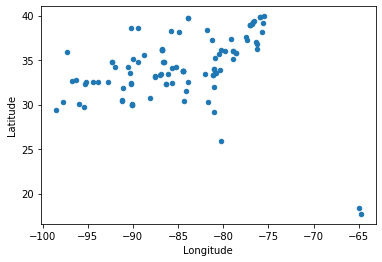

In [14]:
#scatter plot to look for errors
data.plot(x="Longitude",y="Latitude",kind="scatter")

In [15]:
#checking website column for missing data
data['Website'].isna().sum()

0

In [16]:
#checking website column for missing data
data['Website'].isnull().sum()

0

In [17]:
#save data frame to folder
data.to_csv('mydata.csv',encoding='utf-8')